## Student Performance Indicator
#### Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
#### Choose best model
### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
### 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv("data/stud.csv")

## Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Info of Database

df.info()

### 3. Data Checks to perform

#### 3.1 Check Missing values
#### 3.2 Check Duplicates
#### 3.3 Check data type
#### 3.4 Check the number of unique values of each column
#### 3.5 Check statistics of data set
#### 3.6 Check various categories present in the different categorical column


### 3.1 Check for missing values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 3.2 Check Duplicates

In [5]:
df.duplicated().sum()

0

### 3.3 Check Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Make a copy of original Dataset

In [22]:
df_work=df.copy()

### 3.4 Check Unique values in each column

In [23]:
df_work.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [24]:
df_work.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [25]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


### Classifying Numerical and Categorical Features

In [29]:
numerical_feature_list=[feature for feature in df_work.columns if df_work[feature].dtype != "object" ]
categroical_feature_list=[feature for feature in df_work.columns if df_work[feature].dtype == "object" ]

### Create Two more columns which are 'Total_score' and 'Average_score'

In [31]:
df_work["Total_score"] = df_work["math_score"] + df_work["reading_score"] + df_work["writing_score"]
df_work["Average_score"] = df_work["Total_score"]/3

In [32]:
df_work

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [35]:
reading_full = df_work[df_work['reading_score'] == 100]['Average_score'].count()
writing_full = df_work[df_work['writing_score'] == 100]['Average_score'].count()
math_full = df_work[df_work['math_score'] == 100]['Average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

reading_less_20 = df_work[df_work['reading_score'] <= 20]['Average_score'].count()
writing_less_20 = df_work[df_work['writing_score'] <= 20]['Average_score'].count()
math_less_20 = df_work[df_work['math_score'] <= 20]['Average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17
Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

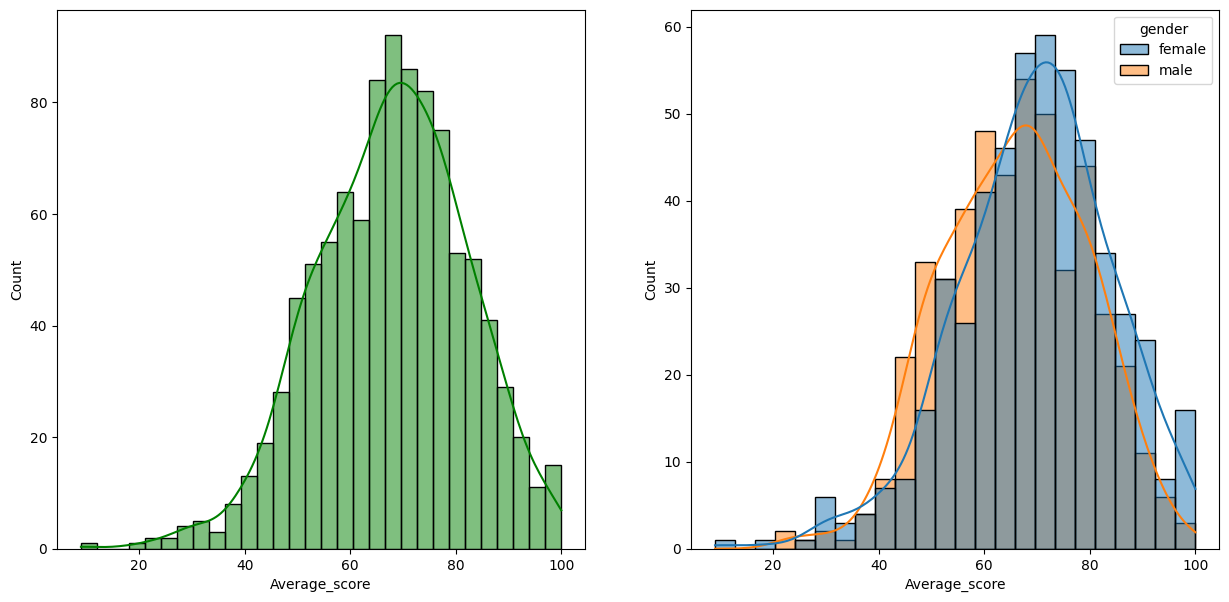

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_work,x='Average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_work,x='Average_score',kde=True,hue='gender')
plt.show()


#####  Insights
- Female students tend to perform well then male students.

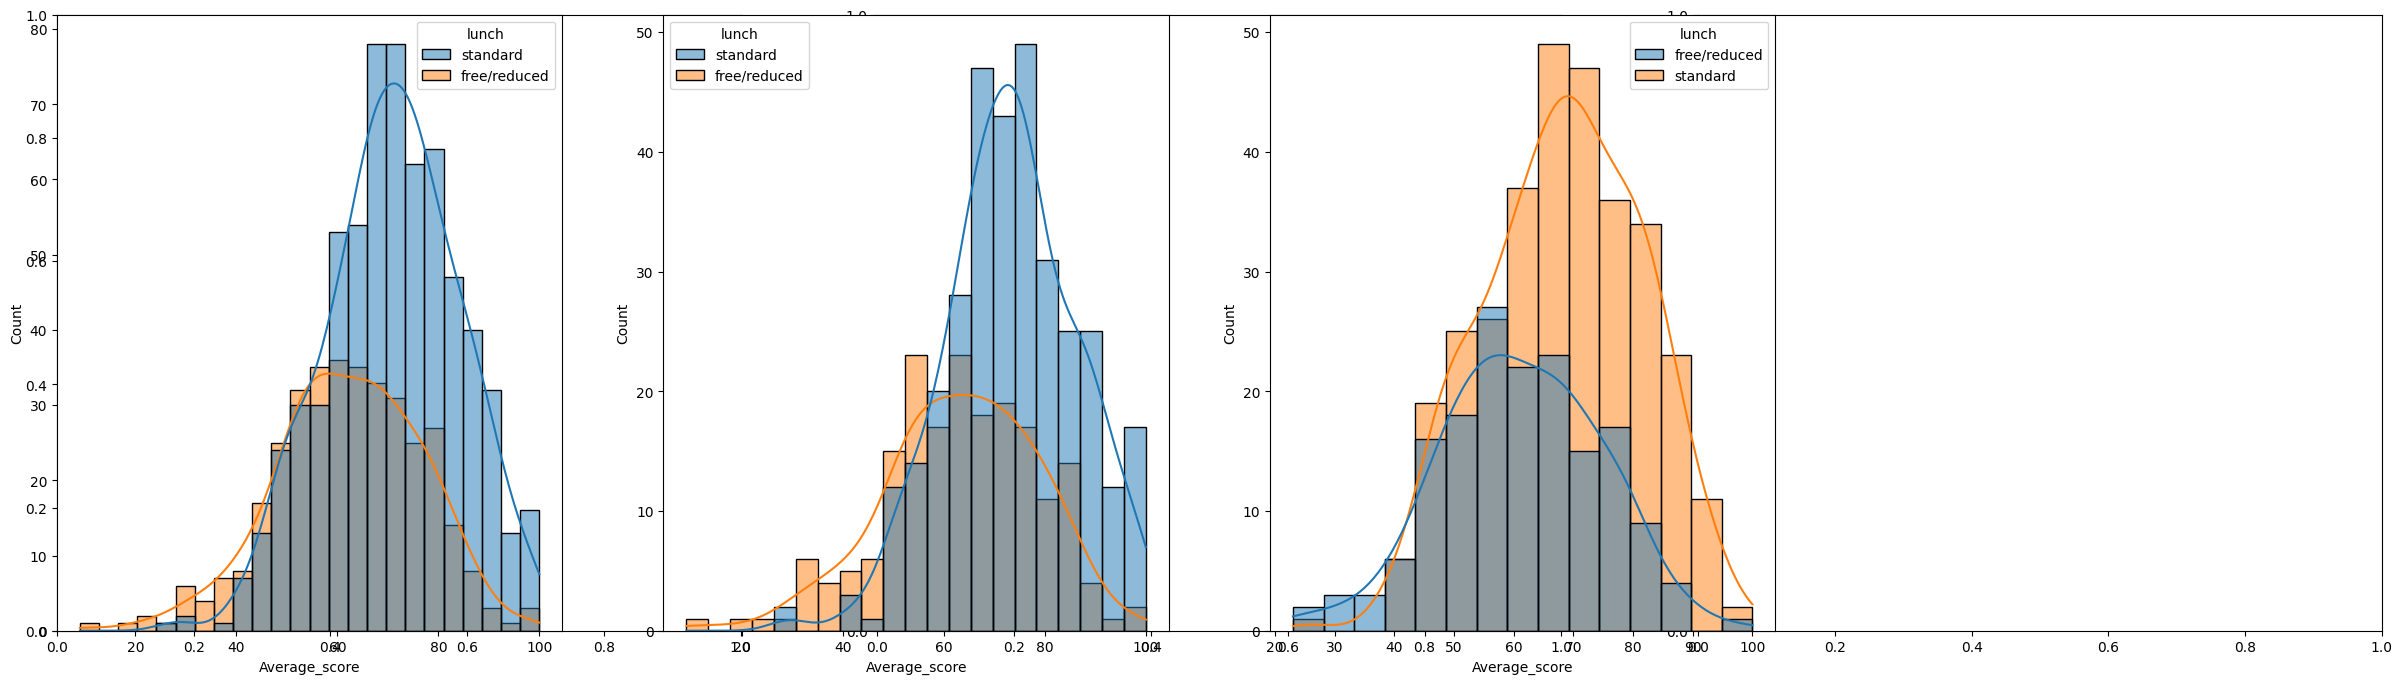

In [52]:
plt.subplots(1,3,figsize=(30,8))
plt.subplot(141)
sns.histplot(data=df_work,x='Average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df_work[df_work.gender=='female'],x='Average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df_work[df_work.gender=='male'],x='Average_score',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

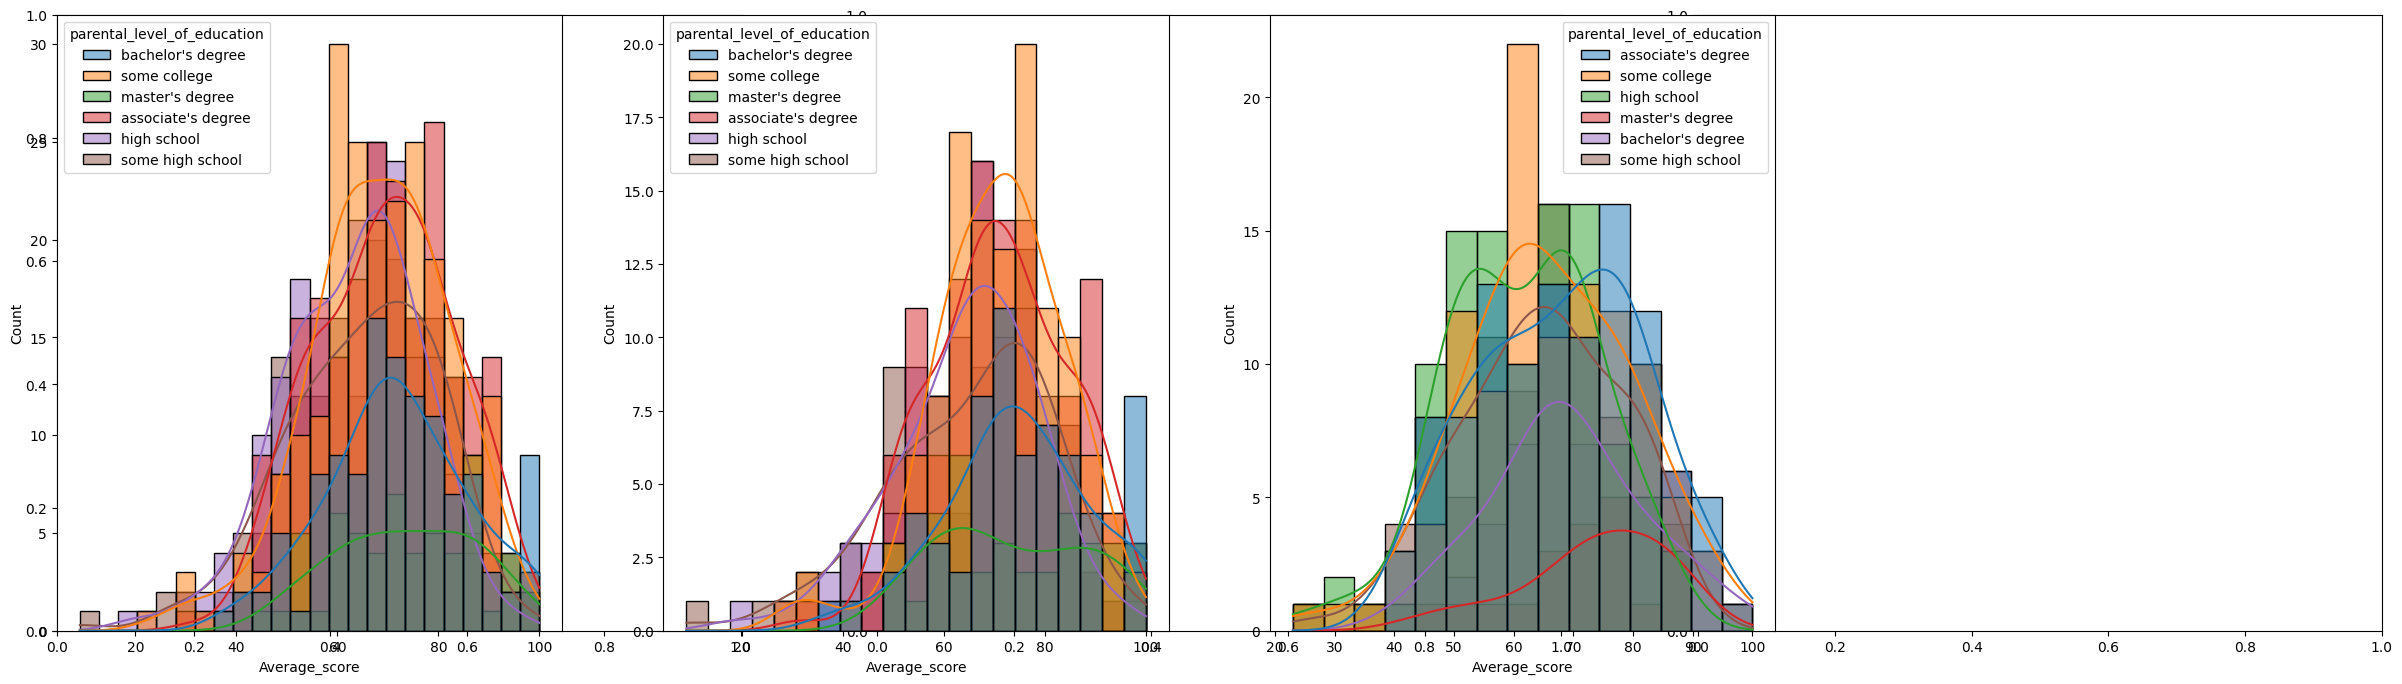

In [53]:
plt.subplots(1,3,figsize=(30,8))
plt.subplot(141)
sns.histplot(data=df_work,x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df_work[df_work.gender=='female'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df_work[df_work.gender=='male'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

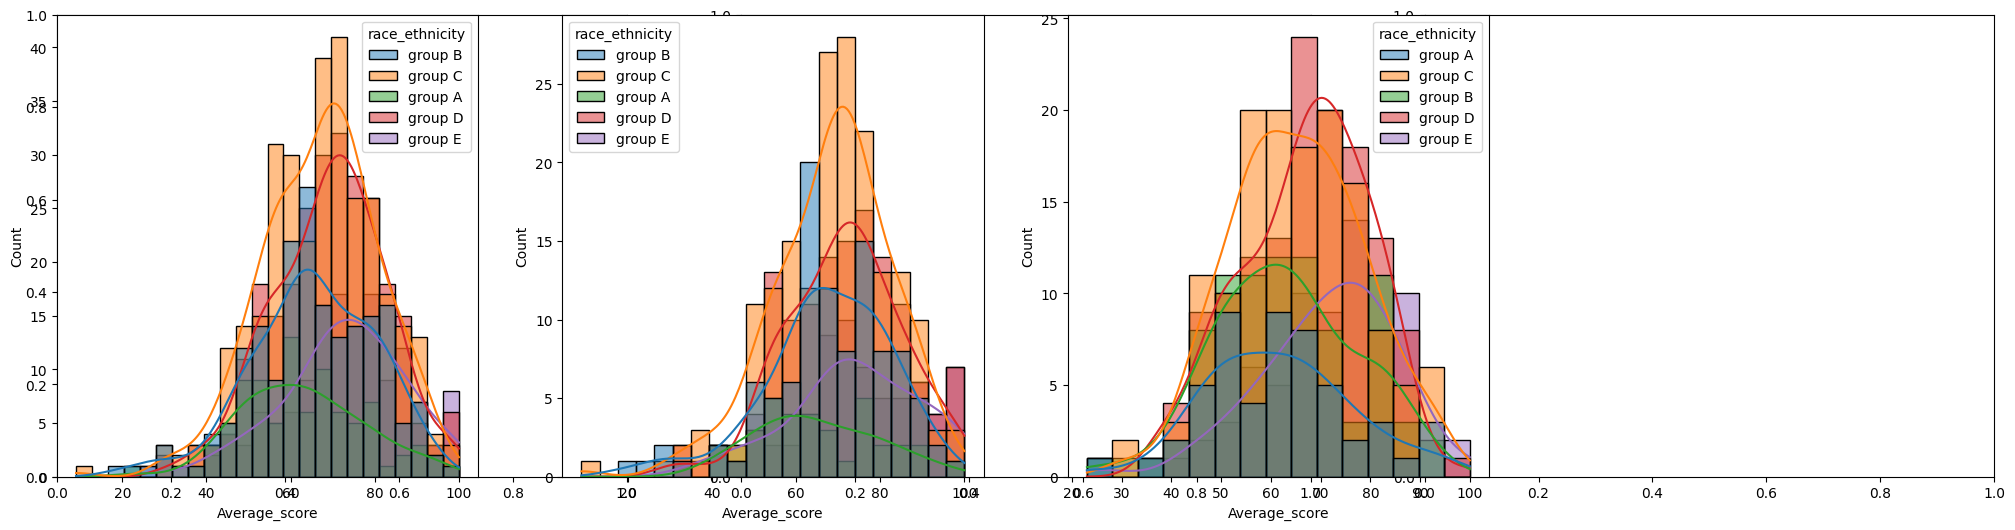

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df_work,x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df_work[df_work.gender=='female'],x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df_work[df_work.gender=='male'],x='Average_score',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

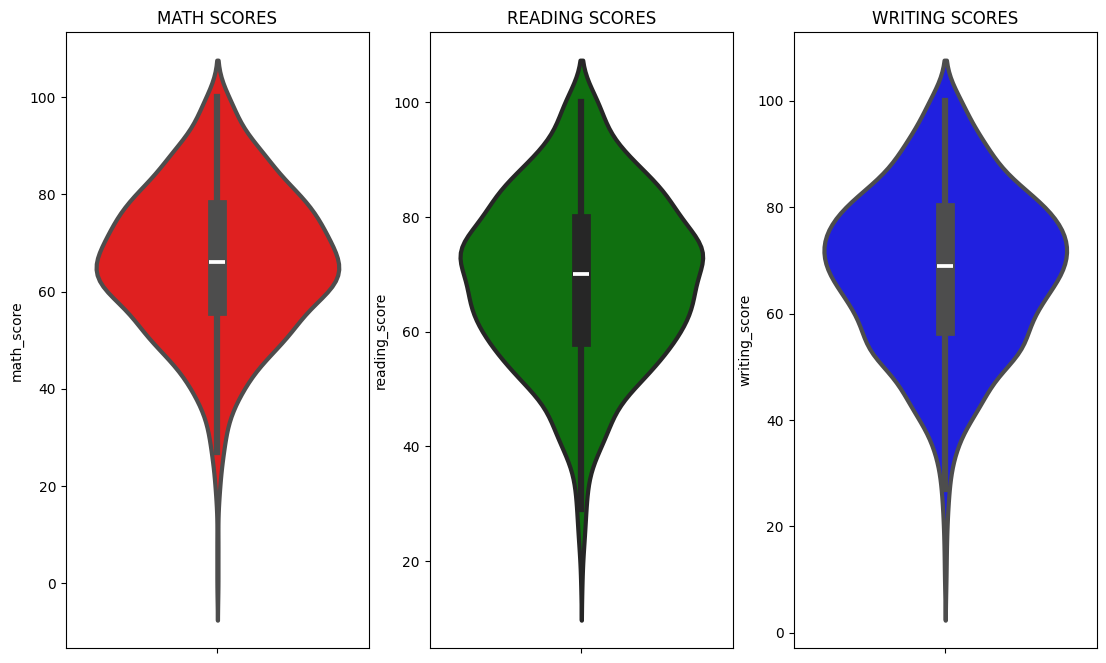

In [55]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df_work,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df_work,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df_work,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80